In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")

In [9]:
data = pd.read_csv("student-mat.csv", sep=";")
predict = "G3"

In [10]:
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data

In [11]:
x = np.array(data.drop([predict], 1))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [13]:
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
    
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

Accuracy: 0.7627259834422025
Accuracy: 0.8946082705853902
Accuracy: 0.9254668221559048
Accuracy: 0.7646574868049878
Accuracy: 0.8951977648500853
Accuracy: 0.8467370265369896
Accuracy: 0.912185645317894
Accuracy: 0.9073105200275507
Accuracy: 0.7731783057174817
Accuracy: 0.7488472607956669
Accuracy: 0.8327802679549284
Accuracy: 0.6834321799830326
Accuracy: 0.8194936857431622
Accuracy: 0.7416302899734548
Accuracy: 0.8843990093687101
Accuracy: 0.6644797678474805
Accuracy: 0.8399625802456601
Accuracy: 0.7875054150324311
Accuracy: 0.8484716311527483
Accuracy: 0.9207696532060575
-------------------------
Coefficient: 
 [ 0.16368285  0.9729473   0.04172369 -0.26930068 -0.17695521]
Intercept: 
 -1.6209715898853432
-------------------------


In [14]:
best

0.9254668221559048

In [15]:
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

13.552961052479644 [15 14  4  2  3] 15
16.18596087488829 [14 16  3  0  1] 16
8.26806164116176 [8 9 0 0 1] 8
11.925082302104794 [12 12  2  0  1] 11
8.258001210604217 [8 9 4 0 2] 10
9.558314198731363 [10 10  4  0  2] 11
7.63839671404666 [ 9  8 15  1  2] 8
3.60265087823913 [6 5 0 1 2] 0
14.994334677996083 [14 15  2  0  2] 15
9.959066847140125 [12 10 10  0  3] 12
5.936563394661754 [ 7  6 18  0  1] 6
8.903582816326656 [ 6 10  4  0  2] 10
-0.3513259065287202 [11  0  0  0  3] 0
11.234908114645282 [10 12  4  1  2] 12
-1.787414601771897 [5 0 0 3 1] 0
15.158017523597259 [15 15  2  0  2] 16
14.161737435630663 [16 14  6  0  4] 15
10.052574665461616 [12 10  8  0  2] 11
7.2016065259154765 [8 8 2 0 2] 8
13.221758719527843 [12 13 14  0  2] 12
10.591316138068086 [ 9  9 56  0  2] 8
8.40841169572113 [10  9  4  0  3] 9
6.698447975098947 [6 8 0 1 1] 8
7.059921176703458 [ 9  7 18  0  2] 6
6.939749083278249 [10  8  3  3  1] 7
10.855415256931787 [13 11  0  0  2] 10
13.13188747191045 [14 13  4  0  2] 13
12.978

No handles with labels found to put in legend.


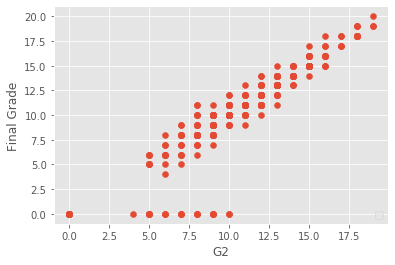

In [20]:
# Drawing and plotting model
plot = "G2"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()